Mounting Google drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Importing the dataset from Google Drive

In [1]:
!cp -r "/content/drive/My Drive/churn/Churn_Modelling.csv" "/content"

In [2]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [3]:
np.random.seed(88)

In [4]:
#dataset loading
churn_df = pd.read_csv('Churn_Modelling.csv')

In [5]:
#displaying of first few rows
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [ ]:
#shows the number of rows and columns
num_rows, num_columns = churn_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10000
Number of columns: 14


In [ ]:
#basic statistics
summary = churn_df.describe()
print(summary)

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

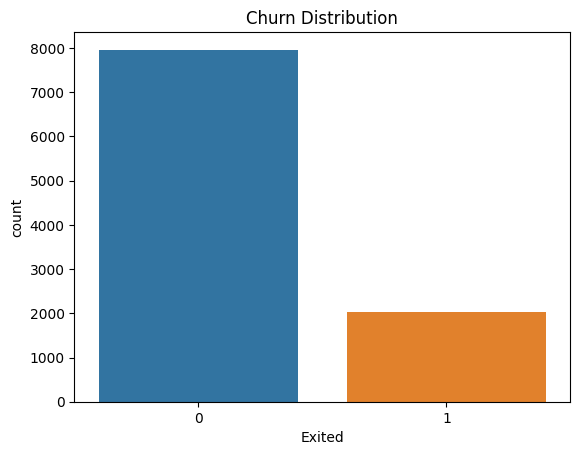

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Exited'
sns.countplot(x='Exited', data=churn_df)
plt.title('Churn Distribution')
plt.show()

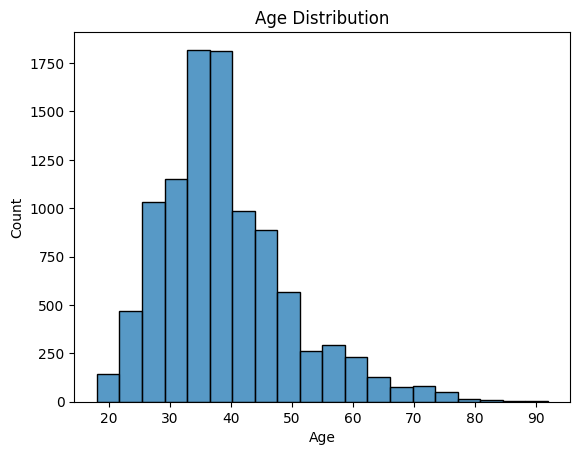

In [ ]:
# Age distribution
sns.histplot(churn_df['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

<ipython-input-6-f98f4c90a30a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_df.corr()


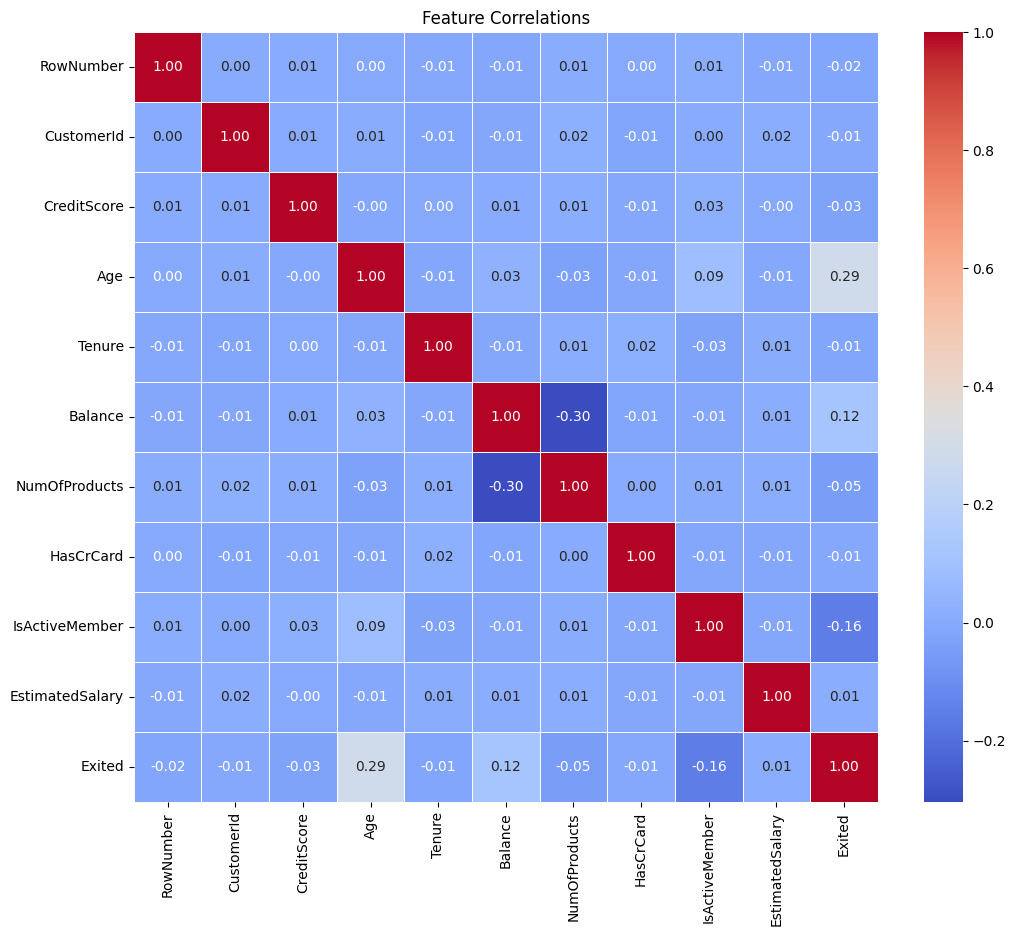

In [6]:
correlation_matrix = churn_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlations')
plt.show()

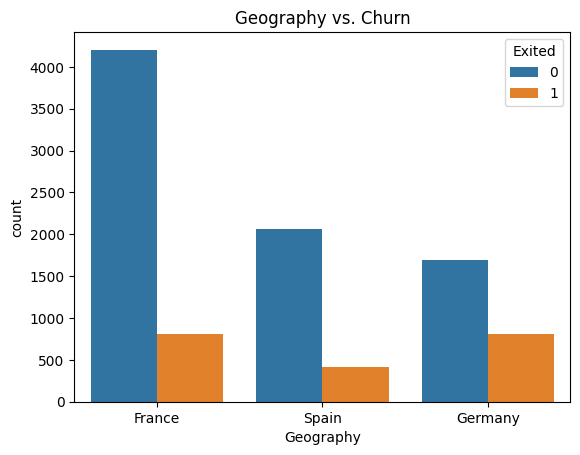

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Geography', hue='Exited', data=churn_df)
plt.title('Geography vs. Churn')
plt.show()

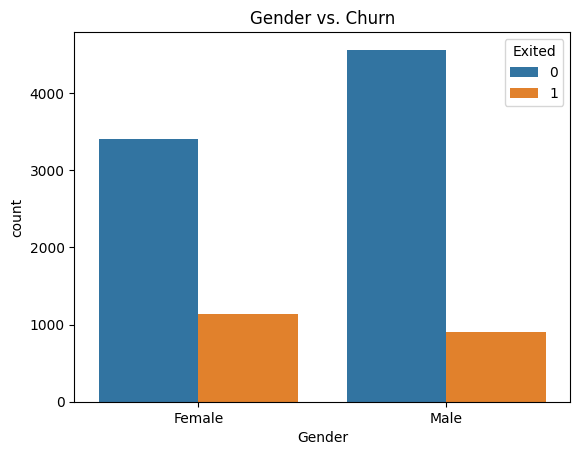

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=churn_df)
plt.title('Gender vs. Churn')
plt.show()

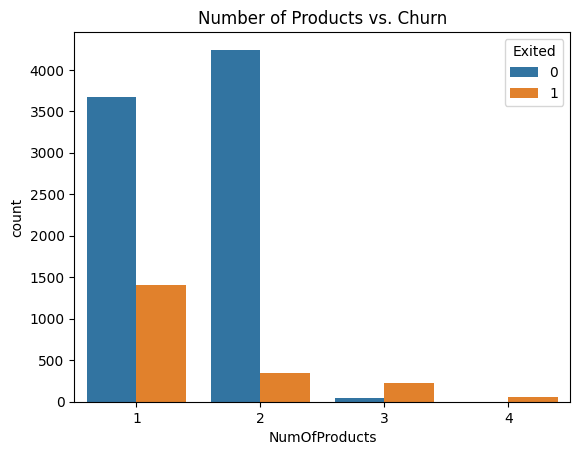

In [ ]:
sns.countplot(x='NumOfProducts', hue='Exited', data=churn_df)
plt.title('Number of Products vs. Churn')
plt.show()

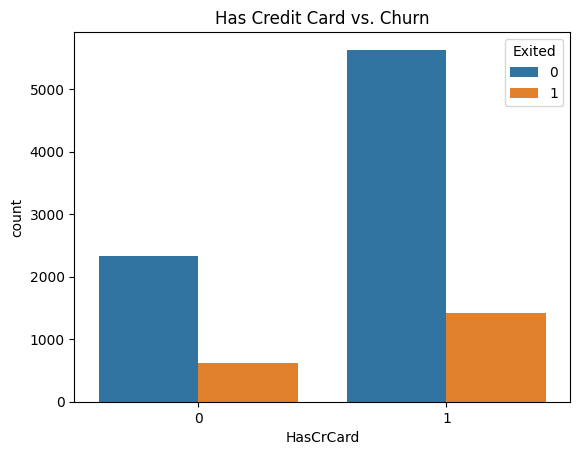

In [ ]:
sns.countplot(x='HasCrCard', hue='Exited', data=churn_df)
plt.title('Has Credit Card vs. Churn')
plt.show()

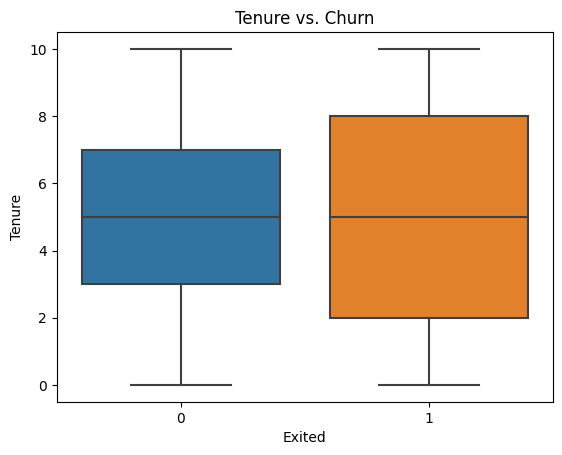

In [ ]:
sns.boxplot(x='Exited', y='Tenure', data=churn_df)
plt.title('Tenure vs. Churn')
plt.show()

### Pre processing

In [ ]:
# Drop unnecessary columns (e.g., RowNumber, CustomerId, Surname) for this analysis
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with the dataset
le = LabelEncoder()

# Convert 'Geography' column
churn_df['Geography'] = le.fit_transform(churn_df['Geography'])

# Convert 'Gender' column
churn_df['Gender'] = le.fit_transform(churn_df['Gender'])

# Convert 'Card Type' column
#churn_df['Card Type'] = le.fit_transform(churn_df['Card Type'])

In [ ]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Extracting features (X) and target variable (y)
X = churn_df.drop(['Exited'], axis=1)
y = churn_df['Exited']

In [ ]:
#Convert X (DataFrame) and y (Series) to numpy arrays
X_array = X.to_numpy()
y_array = y.to_numpy()

#Transpose y_array to convert it into a 2D array with one column
y_array = y_array.reshape(-1, 1)

#Perform the chi-squared test
chi2_stat, p_values, dof, expected = chi2_contingency(X_array, y_array)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming X is your feature matrix (including both numerical and categorical variables) and y is the target variable
# Make sure X includes only numerical values for this approach
X_numerical = X.select_dtypes(include=['number'])

# Initialize the SelectKBest with the chi-squared test
selector = SelectKBest(chi2, k='all')

# Fit the selector to your data
selector.fit(X_numerical, y)

# Get the scores and p-values from the chi-squared test
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to show features, scores, and p-values
feature_stats = pd.DataFrame({
    'Feature': X_numerical.columns,
    'Score': scores,
    'P-value': p_values
})

# Sort the DataFrame based on the p-values
sorted_feature_stats = feature_stats.sort_values(by='P-value')

In [ ]:
# Display the top N features along with their scores and p-values
N = 14  # for example, display the top 5 features
top_n_feature_stats = sorted_feature_stats.head(N)
print(top_n_feature_stats)

           Feature         Score       P-value
3              Age  2.300417e+03  0.000000e+00
5          Balance  7.151303e+06  0.000000e+00
9  EstimatedSalary  4.835088e+04  0.000000e+00
8   IsActiveMember  1.181994e+02  1.568036e-27
0      CreditScore  1.054035e+02  9.963536e-25
2           Gender  5.153993e+01  7.015575e-13
1        Geography  1.185325e+01  5.756078e-04
6    NumOfProducts  5.055394e+00  2.454940e-02
4           Tenure  3.270538e+00  7.053449e-02
7        HasCrCard  1.500410e-01  6.984962e-01


### Implementation

#### Default

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Logistic Regression

In [ ]:
#Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Penalty type
    'solver': ['liblinear']      # Optimization algorithm
}

#Train the Logistic Regression Model with Cross-Validation
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter
print("Best Hyperparameter:", grid_search.best_params_)

# Train the model with the best hyperparameter on the entire training data
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred = best_model.predict(X_test)


Best Hyperparameter: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy

In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8155


Classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



Confusion matrix

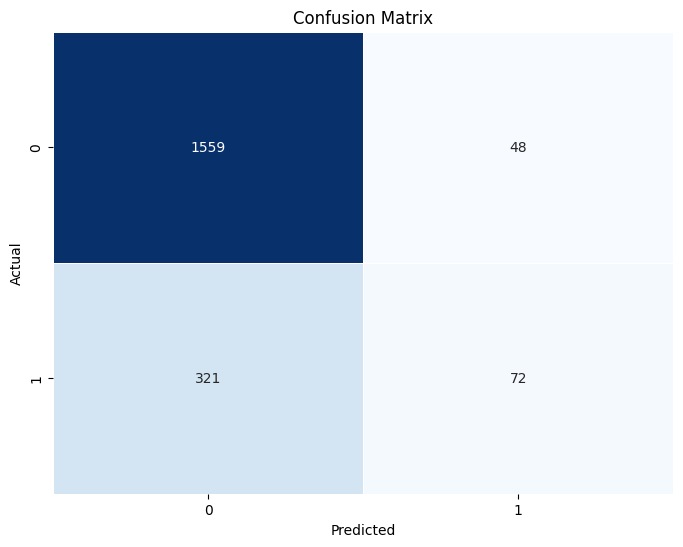

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

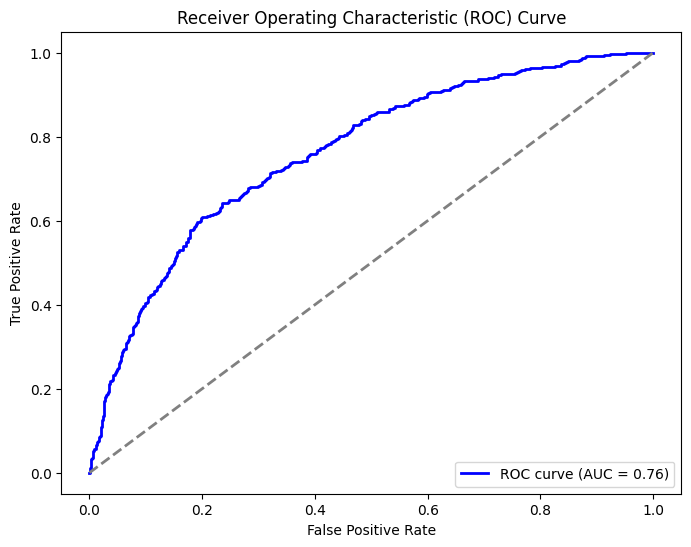

AUC Score: 0.7635630376644167


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Accuracy

In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.859


Classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Confusion matrix

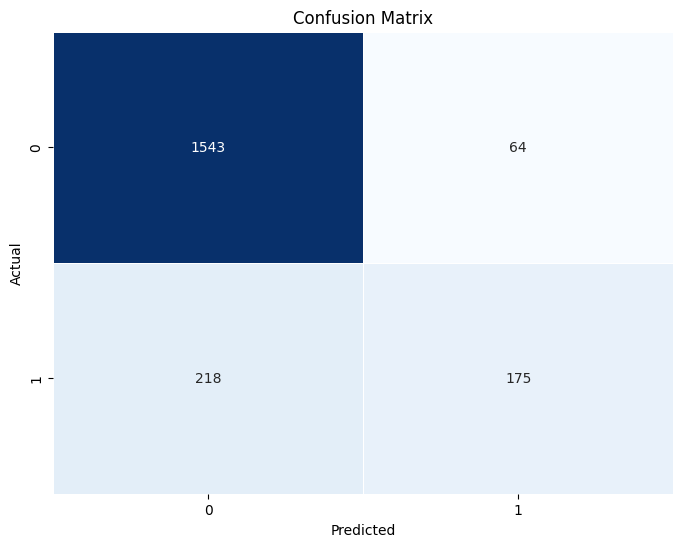

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

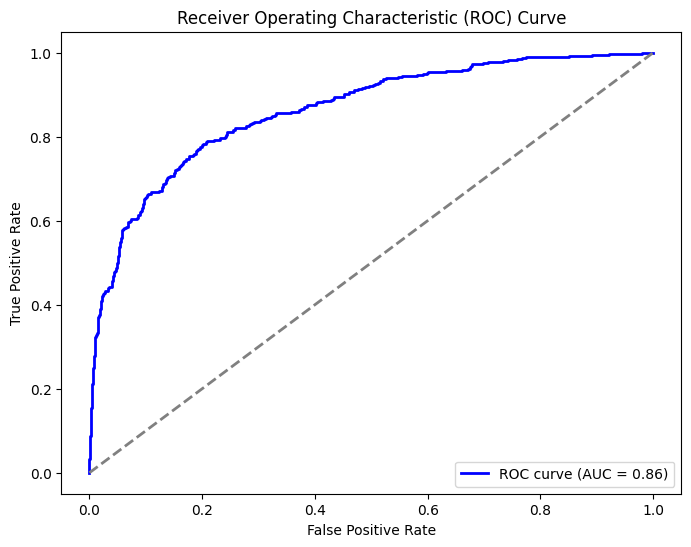

AUC Score: 0.8635612959206778


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### XGB

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

#Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

#Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

#Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

#Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Use the best model for predictions
best_model = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.868


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



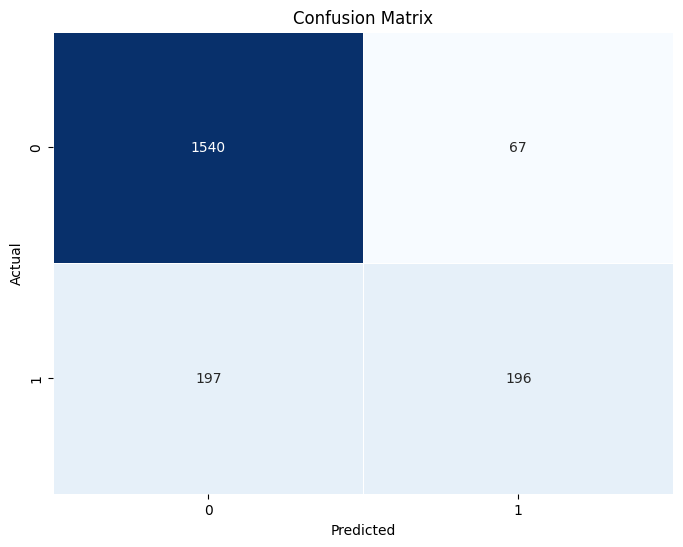

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

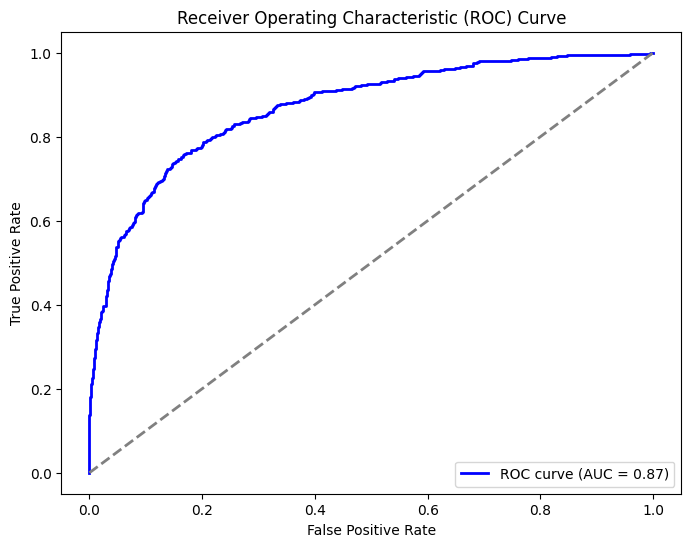

AUC Score: 0.8698505742212426


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

#### SMOTE

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE:
0    6356
1    1644
Name: Exited, dtype: int64

Class distribution after SMOTE:
0    6356
1    6356
Name: Exited, dtype: int64


In [ ]:
#Apply standard scaling to the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

##### Logistic Regression

In [ ]:
#Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Penalty type
    'solver': ['liblinear']      # Optimization algorithm
}

#Train the Logistic Regression Model with Cross-Validation
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameter
print("Best Hyperparameter:", grid_search.best_params_)

# Train the model with the best hyperparameter on the entire training data
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred = best_model.predict(X_test)

Best Hyperparameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.73


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1607
           1       0.38      0.59      0.46       393

    accuracy                           0.73      2000
   macro avg       0.63      0.68      0.64      2000
weighted avg       0.78      0.73      0.75      2000



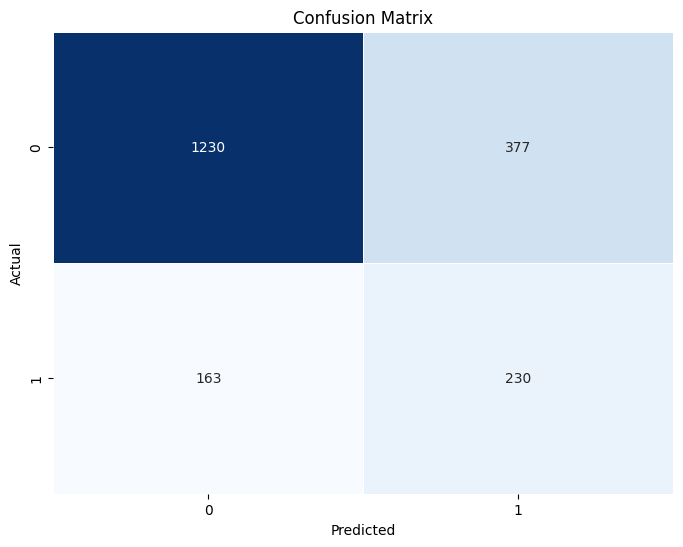

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


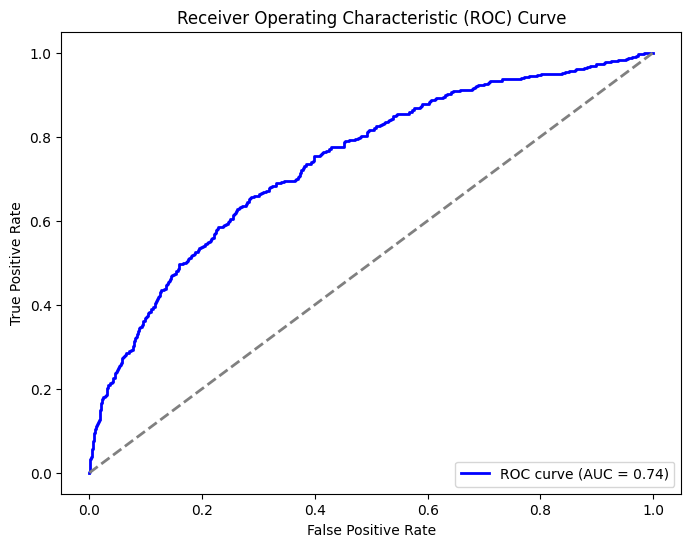

AUC Score: 0.7413542215909721


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy

In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8225


Classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.54      0.65      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



Confusion matrix

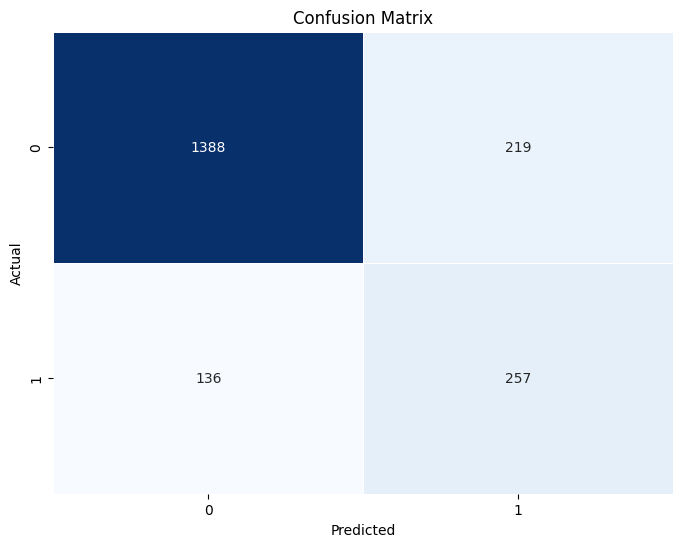

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

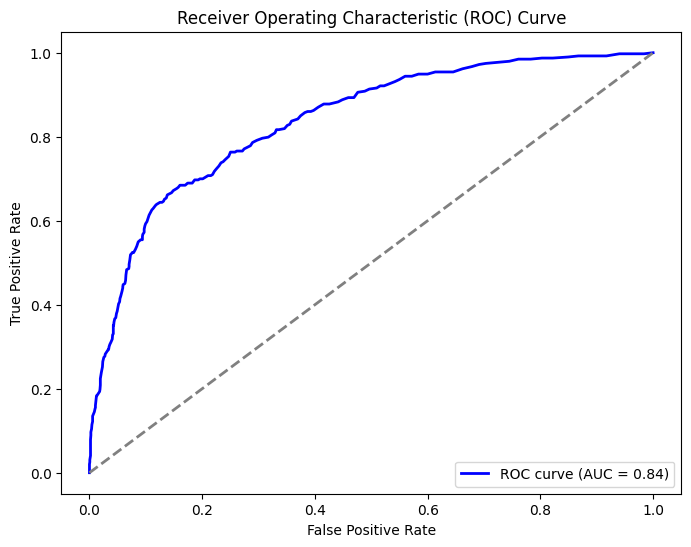

AUC Score: 0.8366877734339745


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### XGB

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

#Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

#Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

#Fit the model with the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

#Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Use the best model for predictions
best_model = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8155


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1607
           1       0.53      0.63      0.57       393

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.82      0.82      2000



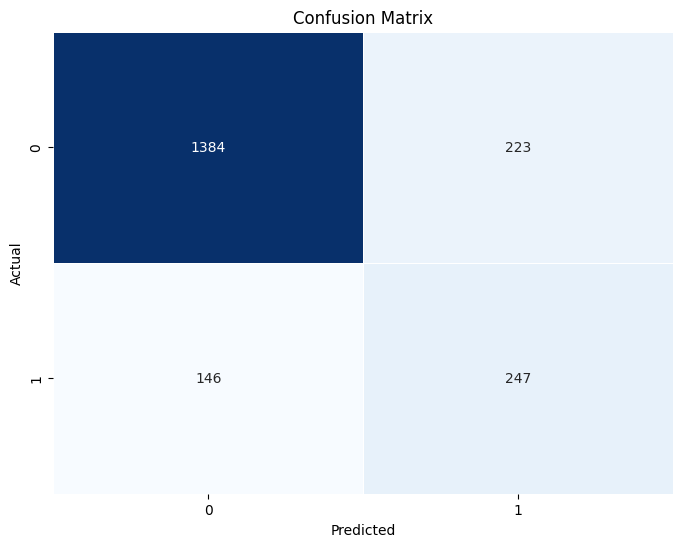

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

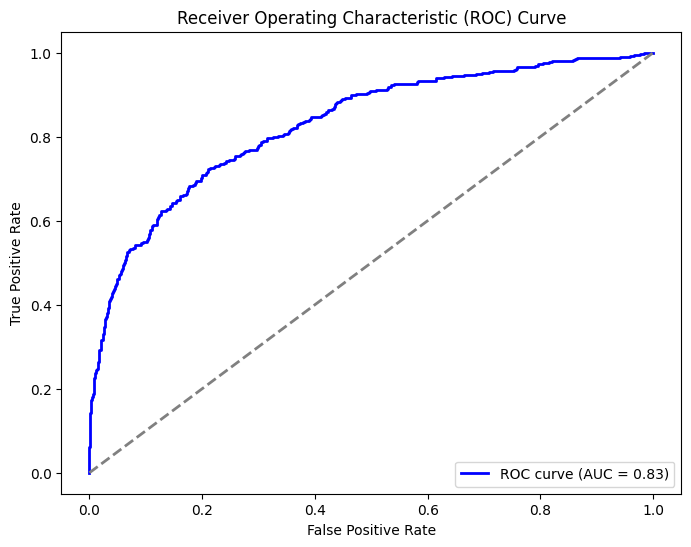

AUC Score: 0.8298411371369852


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

#### RandomUnderSampler

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Displaying the class distribution before balancing
print("Class distribution before balancing:")
print(pd.Series(y_train).value_counts())

# Balancing the dataset using Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Displaying the class distribution after balancing
print("\nClass distribution after balancing:")
print(pd.Series(y_resampled).value_counts())

Class distribution before balancing:
0    6356
1    1644
Name: Exited, dtype: int64

Class distribution after balancing:
0    1644
1    1644
Name: Exited, dtype: int64


In [ ]:
#Apply standard scaling to the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

##### Logistic Regression

In [ ]:
#Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Penalty type
    'solver': ['liblinear']      # Optimization algorithm
}

#Train the Logistic Regression Model with Cross-Validation
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameter
print("Best Hyperparameter:", grid_search.best_params_)

# Train the model with the best hyperparameter on the entire training data
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred = best_model.predict(X_test)

Best Hyperparameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7225


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1607
           1       0.38      0.68      0.49       393

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.75      2000



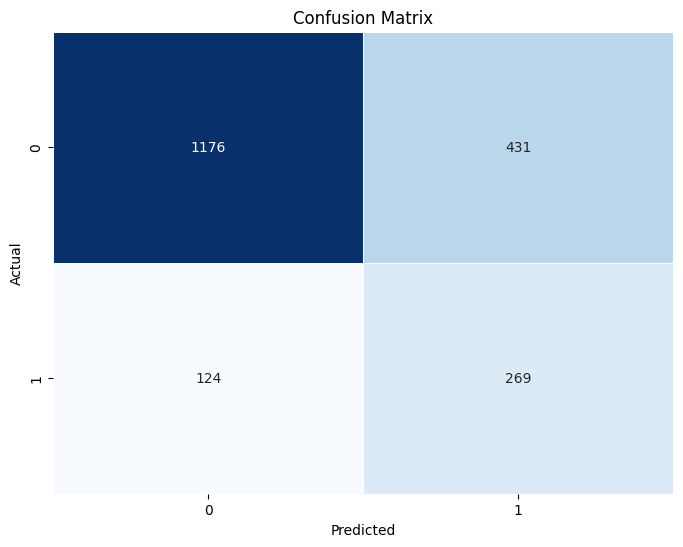

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


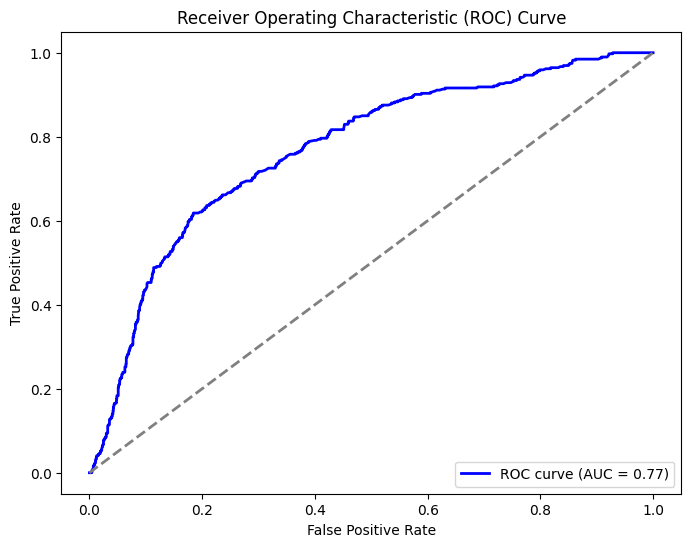

AUC Score: 0.7687201825347438


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


Accuracy

In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7955


Classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1607
           1       0.49      0.75      0.59       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



Confusion matrix

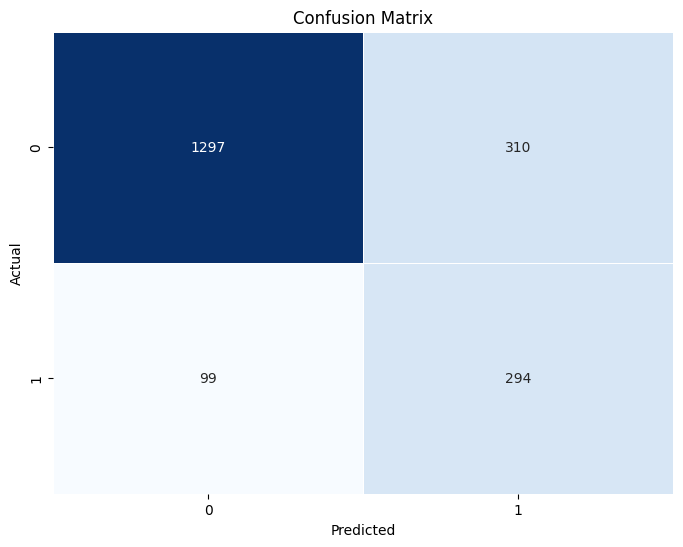

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

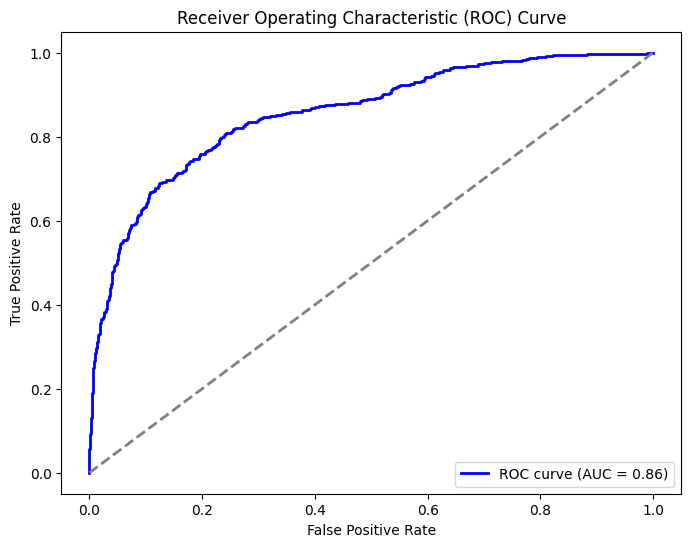

AUC Score: 0.8566608239081246


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### XGB

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

#Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

#Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

#Fit the model with the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

#Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Use the best model for predictions
best_model = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the model on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.78      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.791


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.78      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



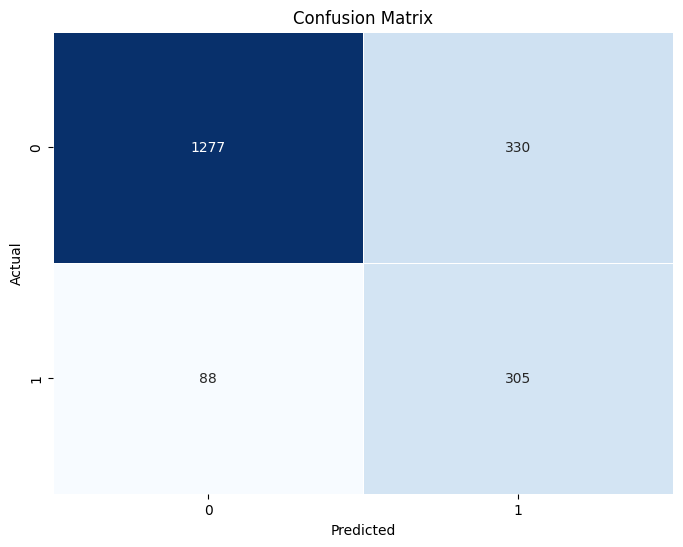

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

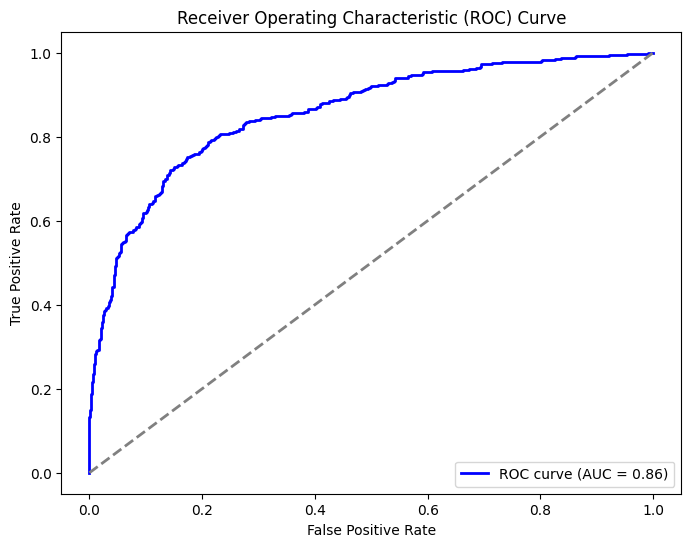

AUC Score: 0.858326564283803


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

#### SMOTEENN

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# Use SMOTEENN to balance the training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
0    6356
1    1644
Name: Exited, dtype: int64
Class distribution before SMOTE:
1    5435
0    4193
Name: Exited, dtype: int64


In [ ]:
#Apply standard scaling to the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

##### Logistic Regression

In [ ]:
#Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Penalty type
    'solver': ['liblinear']      # Optimization algorithm
}

#Train the Logistic Regression Model with Cross-Validation
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameter
print("Best Hyperparameter:", grid_search.best_params_)

# Train the model with the best hyperparameter on the entire training data
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred = best_model.predict(X_test)

Best Hyperparameter: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6565


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      1607
           1       0.34      0.78      0.47       393

    accuracy                           0.66      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.81      0.66      0.69      2000



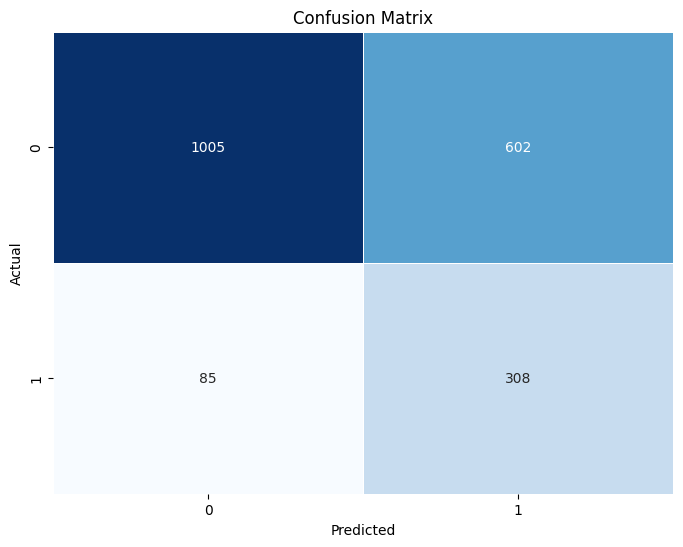

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


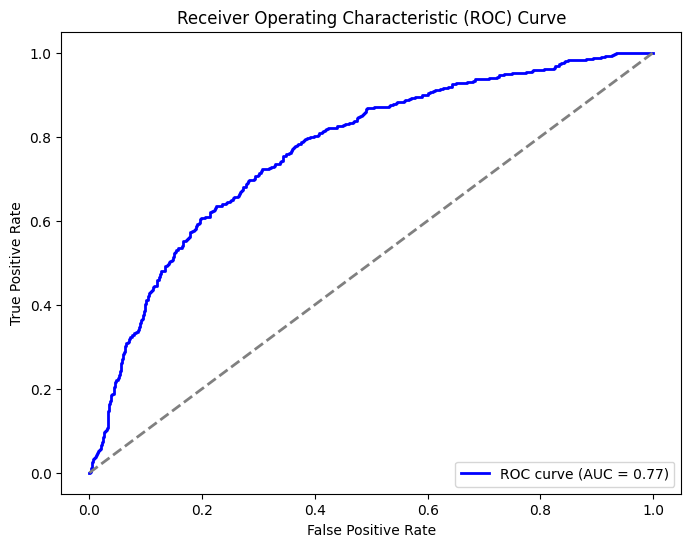

AUC Score: 0.7689751104819722


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy

In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7945


Classification report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1607
           1       0.48      0.74      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.81      2000



Confusion matrix

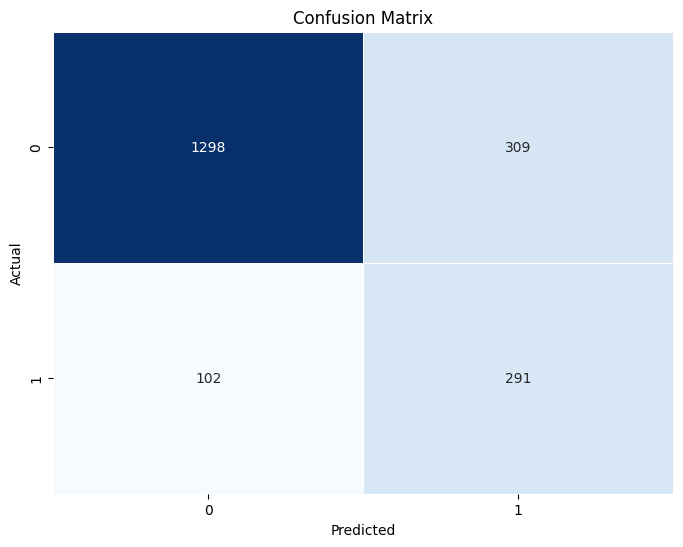

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve

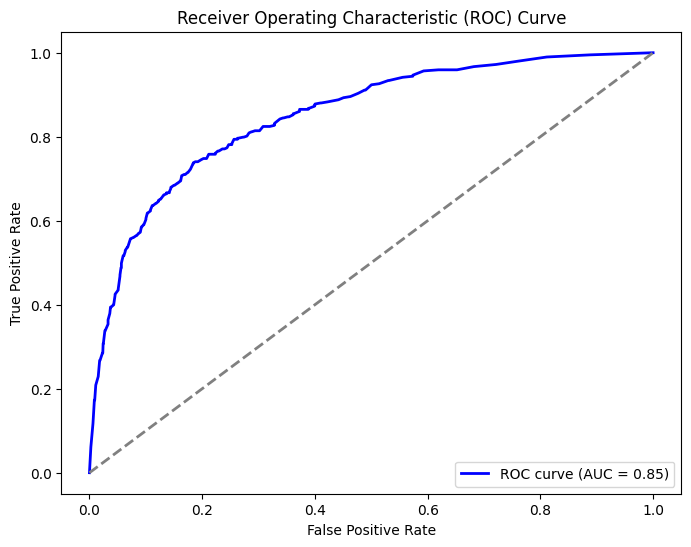

AUC Score: 0.849030402928663


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)

##### XGB

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

#Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

#Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

#Fit the model with the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

#Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

#Use the best model for predictions
best_model = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_model.predict(X_test)

#Evaluate the model on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.823
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.54      0.75      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



In [ ]:
#Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.823


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.54      0.75      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



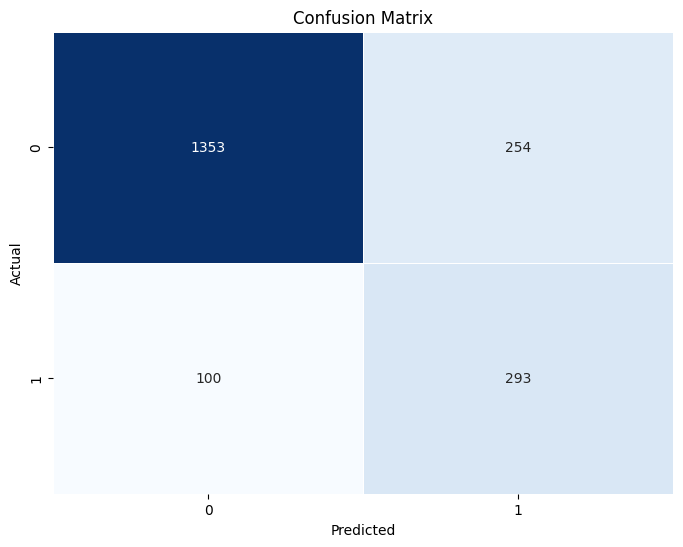

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

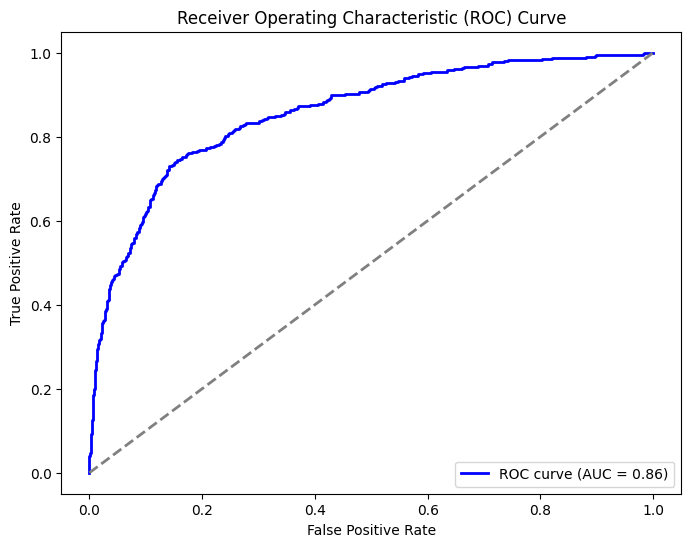

AUC Score: 0.8574984443061606


In [ ]:
# Evaluate the Model with ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Print AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", roc_auc)